In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("C:\\Users\\gabde\\Downloads\\synthetic_db.csv")
df = df[["segment", "magnitude", "engine_cost", "sum"]]
df

,segment,magnitude,engine_cost,sum
0,1,1,27683.571008,41774.757899
1,1,2,53645.343563,73990.154964
2,1,3,65036.314025,116019.808937
3,1,1,70791.487975,115559.326379
4,1,2,51001.016010,100949.117128
...,...,...,...,...
235,3,2,101223.612768,155684.668243
236,3,3,146514.153905,247550.276153
237,3,1,101154.015473,127234.502360
238,3,2,121727.398068,224795.744136


In [24]:
data = pd.get_dummies(df, columns=['segment', 'magnitude'], drop_first=True)

In [25]:
data

,engine_cost,sum,segment_2,segment_3,magnitude_2,magnitude_3
0,27683.571008,41774.757899,False,False,False,False
1,53645.343563,73990.154964,False,False,True,False
2,65036.314025,116019.808937,False,False,False,True
3,70791.487975,115559.326379,False,False,False,False
4,51001.016010,100949.117128,False,False,True,False
...,...,...,...,...,...,...
235,101223.612768,155684.668243,False,True,True,False
236,146514.153905,247550.276153,False,True,False,True
237,101154.015473,127234.502360,False,True,False,False
238,121727.398068,224795.744136,False,True,True,False


In [39]:
binary_cols = ['segment_2', 'segment_3', 'magnitude_2', 'magnitude_3']
data[binary_cols] = data[binary_cols].astype(int)
data

,engine_cost,sum,segment_2,segment_3,magnitude_2,magnitude_3
0,27683.571008,41774.757899,0,0,0,0
1,53645.343563,73990.154964,0,0,1,0
2,65036.314025,116019.808937,0,0,0,1
3,70791.487975,115559.326379,0,0,0,0
4,51001.016010,100949.117128,0,0,1,0
...,...,...,...,...,...,...
235,101223.612768,155684.668243,0,1,1,0
236,146514.153905,247550.276153,0,1,0,1
237,101154.015473,127234.502360,0,1,0,0
238,121727.398068,224795.744136,0,1,1,0


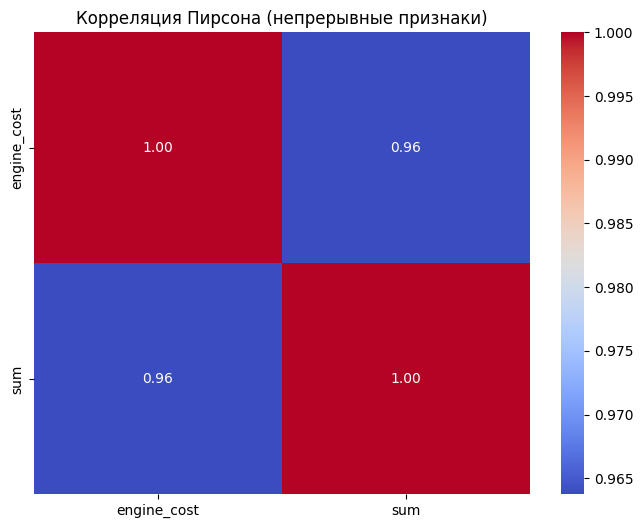

In [44]:
# корреляция
corr_matrix = data[['engine_cost', 'sum']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляция Пирсона (непрерывные признаки)")
plt.show()

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['engine_cost', 'segment_2', 'segment_3', 'magnitude_2', 'magnitude_3']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data) # наблюдается мультиколлинеарность у engine_cost

       feature        VIF
0  engine_cost  13.009552
1    segment_2   1.586306
2    segment_3   4.632274
3  magnitude_2   2.673006
4  magnitude_3   4.603754


In [26]:
X = data[['engine_cost', 'segment_2', 'segment_3', 'magnitude_2', 'magnitude_3']]
y = data['sum']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [46]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=10.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [47]:
results = {}
for name, model in models.items():
    # Обучение
    model.fit(X_train, y_train)
    
    # Предсказание
    y_pred = model.predict(X_test)
    
    # Метрики
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

In [48]:
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  R²: {metrics['R²']:.4f}")

# Выбор лучшей модели по RMSE
best_model_name = min(results, key=lambda k: results[k]['RMSE'])
print(f"\nBest model: {best_model_name}")


Linear Regression:
  MAE: 11392.25
  RMSE: 14167.55
  R²: 0.8915

Ridge:
  MAE: 11356.21
  RMSE: 14125.32
  R²: 0.8921

Random Forest:
  MAE: 13878.00
  RMSE: 17412.42
  R²: 0.8361

Gradient Boosting:
  MAE: 12661.57
  RMSE: 17158.30
  R²: 0.8409

Best model: Ridge
